# Linear Regression
y=mx+c

![alt](Images/LinearRegression.webp)

It's a supeprvised learning algorithm, we do this on labeled data
- Data -> Independent variable
- Label -> Dependent variable

It is always defined by a line hence called Linear Regression


Where it is used?
- How much amount should be given as loan to a person
- right dilution or ratio of insecticide

# What is to be done?
If I have data where one variable is dependent on another then find the relationship in them

By how many units will dependent variable change if independent variable is changed by certain units. 

## What does algorithm actually try to do?
Linear regression tries to draw a line that is equidistant from all points

We try to find coefficient of x and y

We assume that :

- There is no correlation between rigression line and actual point
- there is no inter correlation in independent variables

calculation of M slope

# Understanding Intercept and Slope?
***Intercept:***

- In a regression equation, the intercept is the value of the dependent variable when all the independent variables are equal to zero. It represents the point where the regression line crosses the y-axis.
- For example, in the linear regression equation 

  > 𝑦=𝛽0+𝛽1𝑥+𝜖

  > β0 is the intercept. It shows the expected value of 𝑦 when 𝑥 is zero.

***Coefficient:***

- Coefficients represent the impact or influence of each independent variable on the dependent variable. They quantify the relationship between the variables.

- In the same linear regression equation 
  > 𝑦=𝛽0+𝛽1𝑥+𝜖

  > β1 is the coefficient of 𝑥
  
  It indicates how much 𝑦 is expected to change for a one-unit change in 𝑥, assuming all other variables remain constant.

Together, the intercept and coefficients help to define the regression line or model, providing insights into the relationships between variables and allowing predictions to be made based on these relationships.

## Even simpler explaination
***Intercept:***
Think of it as where the line (or curve) starts on a graph. It's the value of the result (y) when the input (x) is zero.
For example, if you have a graph showing how much money you make (y) based on the hours you work (x), the intercept is the money you’d make even if you don’t work any hours.

***Coefficient:***
This tells you how much the result (y) changes when the input (x) changes. It’s like saying how much more or less you get if you increase the input.
For instance, if your salary increases by $10 for each extra hour you work, then $10 is the coefficient for the number of hours worked. It tells you the impact of each additional hour on your total pay.

> Linear regression by OLS method

![alt](Images/m1.jfif)
![alt](Images/m2.jfif)
![alt](Images/m3.jfif)


Calculatio of C


![alt](Images/m4.jfif)


![alt](Images/m5.jfif)

## Question 
What will be the price of Home if Area is 550SqFt ?

In [1]:
Area = [300, 410, 530, 600, 690,750, 860, 900]
Price = [19, 23, 28, 31, 32, 35, 40, 43]

# Code of Linear Regression

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_excel("Data/home price.xlsx")

In [4]:
df

,Area,Price
0,300,19
1,410,23
2,530,28
3,600,31
4,690,32
5,750,35
6,860,40
7,900,43


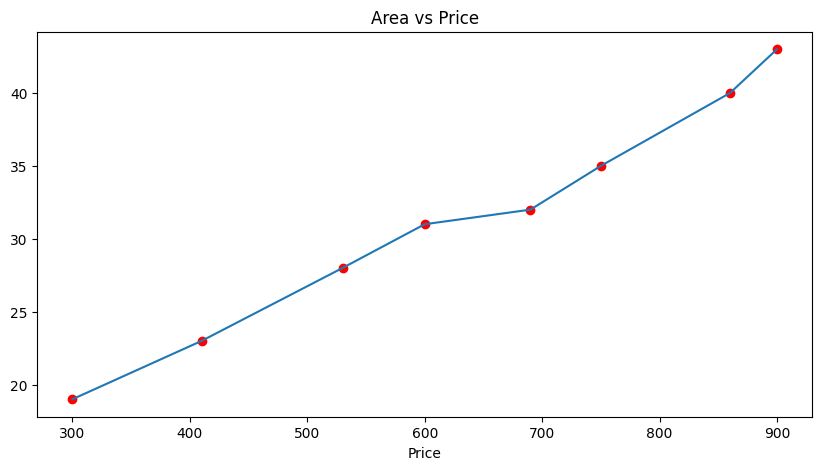

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Area'],df['Price'])
plt.scatter(df['Area'],df['Price'], marker="o", color = "red")
plt.xlabel('Area')
plt.xlabel('Price')
plt.title("Area vs Price")
plt.show()


In [6]:
model = LinearRegression()

Input columns are in ndimension(there can be many input columns) hence as data frame and output column will 2d dimentional hence in Series  as the data 

In [7]:
x=df.drop('Price',axis=1)      
y=df['Price']       # gives Series as output because we are only calling one

In [8]:
x

,Area
0,300
1,410
2,530
3,600
4,690
5,750
6,860
7,900


In [9]:
y

0    19
1    23
2    28
3    31
4    32
5    35
6    40
7    43
Name: Price, dtype: int64

In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
model.predict([[550]])

C:\Users\ALIE-n-WARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.33141026])

Just to check

In [12]:
c= model.intercept_
m= model.coef_

In [13]:
m,c

(array([0.03804487]), 7.406730769230773)

In [14]:
m*550+c     # check against model.predict[[550]]

array([28.33141026])

predicting for all the values given as series

In [15]:
pred = model.predict(x)
pred

array([18.82019231, 23.00512821, 27.57051282, 30.23365385, 33.65769231,
       35.94038462, 40.12532051, 41.64711538])

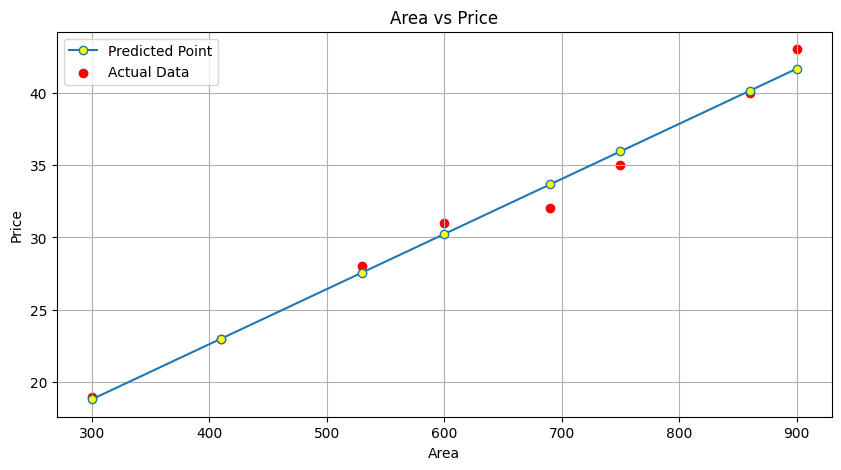

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(df["Area"], pred, marker="o", markerfacecolor="yellow", label="Predicted Point")
plt.scatter(df["Area"], df["Price"], marker="o", color="red", label="Actual Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.title("Area vs Price")
plt.grid()
plt.show()

# Error or difference in actual and predicted points = Residual
Not focusing on single errors we calculate mean error in the prediction vs actual value
some errors will be positive and some will  be negetive so if we add them we will not get the right sum of error so we square the errors so that all the errors become positive

How to quantify errors? use MSE

## Mean Squared Error   (MSE)

here 'y' is actual value and 'pred' is predicted value

In [17]:
np.square(y-pred).mean()

0.7852964743589745

or we can do it directly by importing MSE from sklearn

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,pred)

0.7852964743589745

# **Multiple Linear Regression**

Gives out not a line but **hyperplane** to predict a point

Equation of Multiple Linear Regression is different from Simple Linear Regression<br>
- MLR has as many coefficients as input columns
- But Intercetp will always be one

![alt](Images/multiple%20linear%20regression.png)

**We can use categorical data as input in Linear regression or Multiple Linear regression**

In [19]:
df = pd.read_csv(r"Data/Medical Insurance Data.csv")

In [20]:
df.head()


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Describe gives out only columns with continous data.

In [22]:
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Method to print multiple columns from df as boxplot

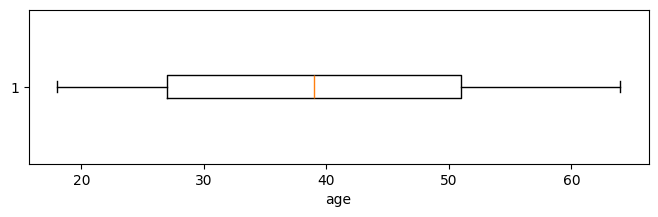

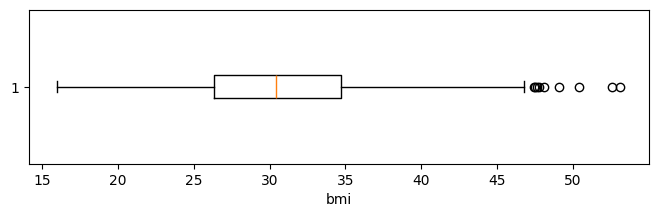

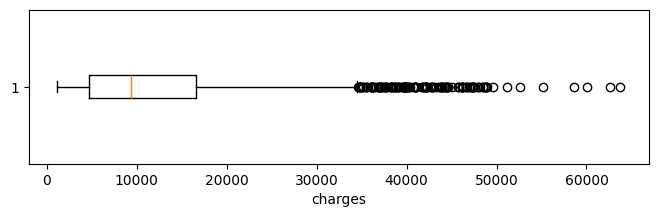

In [23]:
for i in ["age", "bmi", "charges"]:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.xlabel(i)
    plt.show()

method to print value count from multiple columns to save time

In [24]:
for i in ["gender", "children", "smoker", "region"]:
    print(df[i].value_counts())


gender
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Finding out what columns are actually imporrtant and have impact on target column which is ""charges""

In [25]:
df[["children", "charges"]].corr()


,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [26]:
df.groupby('region')["charges"].mean()


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [27]:
df.groupby('gender')["charges"].mean()


gender
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [28]:
df.groupby('smoker')["charges"].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

converting categorical data to numeric data using dummies.

In [29]:
dummies = pd.get_dummies(df[["smoker", "gender", "region"]], dtype=int, drop_first=True)


dropping unecessary column

In [30]:
df.drop(["smoker", "gender", "region", "children"], axis=1, inplace=True)


In [31]:
df.head()


,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


creating new_df by  categorical to numeric converted data and rest of the actual df

In [32]:
new_df = pd.concat([dummies, df], axis=1)


In [33]:
new_df.head()


,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,age,bmi,charges
0,1,0,0,0,1,19,27.900,16884.92400
1,0,1,0,1,0,18,33.770,1725.55230
2,0,1,0,1,0,28,33.000,4449.46200
3,0,1,1,0,0,33,22.705,21984.47061
4,0,1,1,0,0,32,28.880,3866.85520


In [34]:
new_df.corr()

,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,age,bmi,charges
smoker_yes,1.000000,0.076185,-0.036945,0.068498,-0.036945,-0.025019,0.003750,0.787251
gender_male,0.076185,1.000000,-0.011156,0.017117,-0.004184,-0.020856,0.046371,0.057292
region_northwest,-0.036945,-0.011156,1.000000,-0.346265,-0.320829,-0.000407,-0.135996,-0.039905
region_southeast,0.068498,0.017117,-0.346265,1.000000,-0.346265,-0.011642,0.270025,0.073982
region_southwest,-0.036945,-0.004184,-0.320829,-0.346265,1.000000,0.010016,-0.006205,-0.043210
age,-0.025019,-0.020856,-0.000407,-0.011642,0.010016,1.000000,0.109272,0.299008
bmi,0.003750,0.046371,-0.135996,0.270025,-0.006205,0.109272,1.000000,0.198341
charges,0.787251,0.057292,-0.039905,0.073982,-0.043210,0.299008,0.198341,1.000000


In [35]:
new_df.drop(["gender_male",	"region_northwest",	"region_southeast",	"region_southwest"],axis=1, inplace=True)

In [36]:
new_df.head()

,smoker_yes,age,bmi,charges
0,1,19,27.900,16884.92400
1,0,18,33.770,1725.55230
2,0,28,33.000,4449.46200
3,0,33,22.705,21984.47061
4,0,32,28.880,3866.85520


In [37]:
new_df.describe()


,smoker_yes,age,bmi,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.204783,39.207025,30.663397,13270.422265
std,0.403694,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,0.000000,39.000000,30.400000,9382.033000
75%,0.000000,51.000000,34.693750,16639.912515
max,1.000000,64.000000,53.130000,63770.428010


standardising data as columns have diffrent ranges of data

In [38]:
scaler = StandardScaler()


In [39]:
scaled_data = scaler.fit_transform(new_df[["age", "bmi"]])
scaled_data


array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [40]:
np.round(scaled_data[:, 1].mean())


-0.0

In [41]:
scaled_data[:, 1].std()


1.0

In [42]:
new_df[["age", "bmi"]] = scaled_data


In [43]:
new_df


,smoker_yes,age,bmi,charges
0,1,-1.438764,-0.453320,16884.92400
1,0,-1.509965,0.509621,1725.55230
2,0,-0.797954,0.383307,4449.46200
3,0,-0.441948,-1.305531,21984.47061
4,0,-0.513149,-0.292556,3866.85520
...,...,...,...,...
1333,0,0.768473,0.050297,10600.54830
1334,0,-1.509965,0.206139,2205.98080
1335,0,-1.509965,1.014878,1629.83350
1336,0,-1.296362,-0.797813,2007.94500


In [44]:
X = new_df.drop("charges", axis=1)

In [45]:
y = new_df["charges"]

In [46]:
X

,smoker_yes,age,bmi
0,1,-1.438764,-0.453320
1,0,-1.509965,0.509621
2,0,-0.797954,0.383307
3,0,-0.441948,-1.305531
4,0,-0.513149,-0.292556
...,...,...,...
1333,0,0.768473,0.050297
1334,0,-1.509965,0.206139
1335,0,-1.509965,1.014878
1336,0,-1.296362,-0.797813


In [47]:
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [48]:
model = LinearRegression()


In [49]:
model.fit(X, y)


LinearRegression()

In [50]:
model.predict([[0, -0.797954, 0.383307]])


C:\Users\ALIE-n-WARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6236.79737483])

In [51]:
y_pred = model.predict(X)
y_pred


array([26079.21861526,  3889.73745805,  6236.79872129, ...,
        4883.39206713,  2097.13732413, 37357.67296584])

In [52]:
np.sqrt(mean_squared_error(y, y_pred))


6083.206042088949

In [ ]:
np.sqrt(mean_squared_error(y, y_pred)) ## RMSE ---> Root Mean Squared Error
y.mean()
new_df
def outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return dataframe[(dataframe[column]<lower) | (dataframe[column]>upper)]
outliers(new_df, "bmi")
outliers(new_df, "bmi").index.tolist()
new_df["bmi"].plot.box()
new_df.drop(outliers(new_df, "bmi").index.tolist(), axis=0, inplace=True)
outliers(new_df, "bmi")
outliers(new_df, "charges").index.tolist()
new_df.drop(outliers(new_df, "charges").index.tolist(), axis=0, inplace=True)
outliers(new_df, "charges")
new_df.drop(outliers(new_df, "charges").index.tolist(), axis=0, inplace=True)
outliers(new_df, "charges")
new_df.drop(outliers(new_df, "charges").index.tolist(), axis=0, inplace=True)
outliers(new_df, "charges")
new_df.drop(outliers(new_df, "charges").index.tolist(), axis=0, inplace=True)
outliers(new_df, "charges")
new_df.drop(outliers(new_df, "charges").index.tolist(), axis=0, inplace=True)
outliers(new_df, "charges")
new_df.info()
new_df.reset_index(drop=True, inplace=True)
new_df
X1 = new_df.drop("charges", axis=1)
y1 = new_df["charges"]
X1
y1
model1 = LinearRegression()
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)
np.sqrt(mean_squared_error(y1, y_pred1))
r2_score(y1, y_pred1)
y1.mean()


# Encoding
converting textual column to numeriaca column

There are two kinds:
- **Nominal** order dosent matter
    - Ex: Region - SE SW NE NW these are different directions but their order does not have any impact
    - When converting to numeric data each SE SW NE NW will have a column with values 0 and 1
- **Ordianl** order matters
    - Ex: Grade - A+ A B+ B C+ C  these are grades of students and each of them signify an impact
    - When converting to numeric data we it will have one column "Grade" but 6 kinds of values 0 to 5

Machine will understand everything numerically hence if impact of SE SW NE NW all are same then it's not right to give them different numbers because that will signify different impact.

How?
- Get Dummies(pandas)
- onehotencoder(sklearn)
- lable encoder(sklearn) 
- lambda function
- map


working with ordinal

# Standard Scalar(input column only)
When there are **more than one column** in df where the values in those columns are not in scale if 0 to 1

- For Eg, age data in df if from 18 to 70, so we use standard scalar in this case
- When standard scalar is applied data's mean becomes 0 and std dev becomes 1
    - if standard scalar is applied on 10 columns there whole mean and stddev or indivisual mean and stddev both are 0 and 1 respectively

In [ ]:
code

# Min Max Scalar(booth input and output)
when there is **only one column** which is not in range of 0 to 1 
- It can be applied on output column as well

# R2 score or Rsquared or Residual Squared
![alt](Images/r2.png)

Tells error in percentage terms
Increases with number of columns even if input and output column have high correlation or not


# Adjusted R2 Score
Either remains constant or decreases new added input column is not correlated
it increases when new added input column is correlated